In [1]:
import math
from collections import defaultdict

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid", context="poster")

In [3]:
native = pd.read_csv("throughput-native.csv")
erimized_kernel = pd.read_csv("throughput-kernel-erim.csv")

erimized_ptrace = pd.read_csv("throughput-ptrace-erim.csv")
erimized_ptrace_traced = pd.read_csv("throughput-ptrace-erim-traced.csv")
erimized_ptrace_open = pd.read_csv("throughput-ptrace-erim-open.csv")

In [12]:
native_to_req = dict()
for index, row in native.iterrows():
    native_to_req[row['Filesize']] = row['Reqs/s']

erimized_kernel_to_req = dict()
for index, row in erimized_kernel.iterrows():
    erimized_kernel_to_req[row['Filesize']] = row['Reqs/s']

erimized_ptrace_to_req = dict()
for index, row in erimized_ptrace.iterrows():
    erimized_ptrace_to_req[row['Filesize']] = row['Reqs/s']
    
erimized_ptrace_traced_to_req = dict()
for index, row in erimized_ptrace_traced.iterrows():
    erimized_ptrace_traced_to_req[row['Filesize']] = row['Reqs/s']
    
erimized_ptrace_open_to_req = dict()
for index, row in erimized_ptrace_open.iterrows():
    erimized_ptrace_open_to_req[row['Filesize']] = row['Reqs/s']

## Slices

- first: Native, Erim kernel, Erim ptrace
- second: Native, Erim ptrace, Erim open, Erim all

In [13]:
first_normalized_reqs_data = defaultdict(list)
for (nk, nv), (ek, ev), (etk, etv) in zip(native_to_req.items(), erimized_kernel_to_req.items(), erimized_ptrace_to_req.items()):
    first_normalized_reqs_data['File size'].append(nk)
    first_normalized_reqs_data['Normalized Throughput (%)'].append((ev / nv) * 100.0)
    first_normalized_reqs_data['Build'].append('ERIM Kernel')
    
for (nk, nv), (ek, ev), (etk, etv) in zip(native_to_req.items(), erimized_kernel_to_req.items(), erimized_ptrace_to_req.items()):
    first_normalized_reqs_data['File size'].append(nk)
    first_normalized_reqs_data['Normalized Throughput (%)'].append((etv / nv) * 100.0)
    first_normalized_reqs_data['Build'].append('ERIM ptrace')

for (nk, nv), (ek, ev), (etk, etv) in zip(native_to_req.items(), erimized_kernel_to_req.items(), erimized_ptrace_to_req.items()):
    first_normalized_reqs_data['File size'].append(nk)
    first_normalized_reqs_data['Normalized Throughput (%)'].append(100.0)
    first_normalized_reqs_data['Build'].append('Native')
    
first_normalized_reqs_df = pd.DataFrame(first_normalized_reqs_data)

In [14]:
second_normalized_reqs_data = defaultdict(list)
for (nk, nv), (ek, ev), (etk, etv), (eok, eov) in zip(native_to_req.items(), erimized_ptrace_to_req.items(), erimized_ptrace_traced_to_req.items(), erimized_ptrace_open_to_req.items()):
    second_normalized_reqs_data['File size'].append(nk)
    second_normalized_reqs_data['Normalized Throughput (%)'].append((ev / nv) * 100.0)
    second_normalized_reqs_data['Build'].append('ERIM ptrace')
    
for (nk, nv), (ek, ev), (etk, etv), (eok, eov) in zip(native_to_req.items(), erimized_ptrace_to_req.items(), erimized_ptrace_traced_to_req.items(), erimized_ptrace_open_to_req.items()):
    second_normalized_reqs_data['File size'].append(nk)
    second_normalized_reqs_data['Normalized Throughput (%)'].append((etv / nv) * 100.0)
    second_normalized_reqs_data['Build'].append('ERIM All Traces')

for (nk, nv), (ek, ev), (etk, etv), (eok, eov) in zip(native_to_req.items(), erimized_ptrace_to_req.items(), erimized_ptrace_traced_to_req.items(), erimized_ptrace_open_to_req.items()):
    second_normalized_reqs_data['File size'].append(nk)
    second_normalized_reqs_data['Normalized Throughput (%)'].append((eov / nv) * 100.0)
    second_normalized_reqs_data['Build'].append('ERIM Open Only')
    
for (nk, nv), (ek, ev), (etk, etv), (eok, eov) in zip(native_to_req.items(), erimized_ptrace_to_req.items(), erimized_ptrace_traced_to_req.items(), erimized_ptrace_open_to_req.items()):
    second_normalized_reqs_data['File size'].append(nk)
    second_normalized_reqs_data['Normalized Throughput (%)'].append(100.0)
    second_normalized_reqs_data['Build'].append('Native')
    
second_normalized_reqs_df = pd.DataFrame(second_normalized_reqs_data)

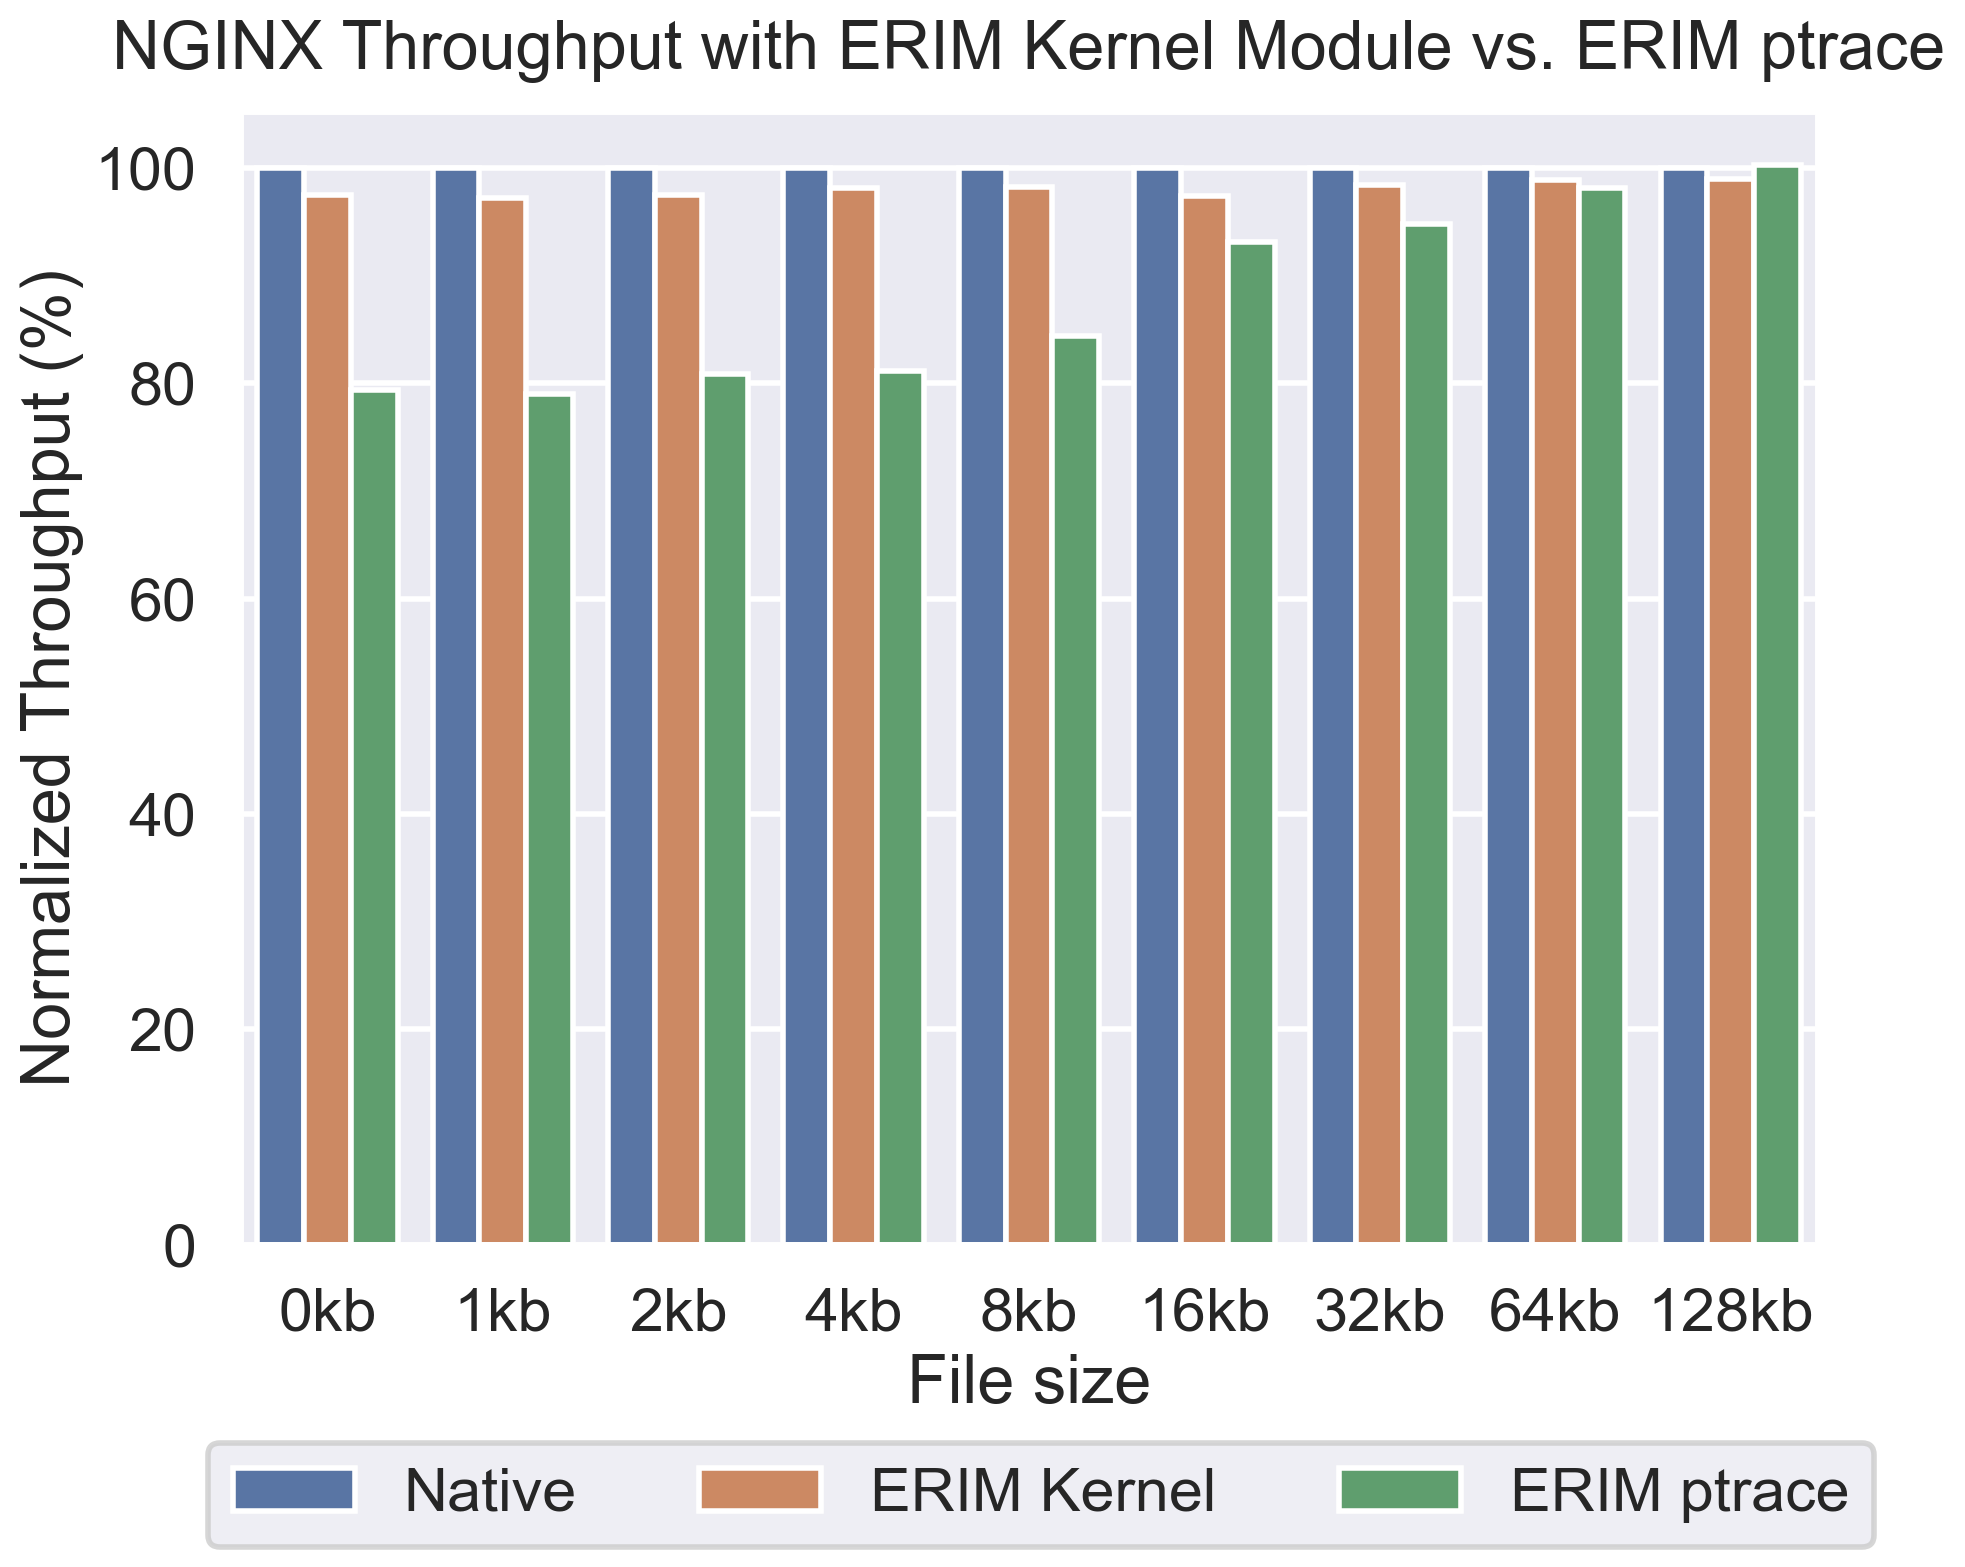

In [18]:
fig, ax = plt.subplots(figsize=(10,8), dpi=200)
sns.barplot(x='File size', y='Normalized Throughput (%)', data=first_normalized_reqs_df, hue='Build', hue_order=['Native', 'ERIM Kernel', 'ERIM ptrace'], palette="deep", ax=ax)
plt.legend(bbox_to_anchor=(-0.02, -0.175), loc=2, borderaxespad=0., ncol=3)
plt.title("NGINX Throughput with ERIM Kernel Module vs. ERIM ptrace", fontsize=24, pad=15)
plt.tight_layout()
plt.savefig('throughput-ptrace-vs-kernel.png', dpi=200)

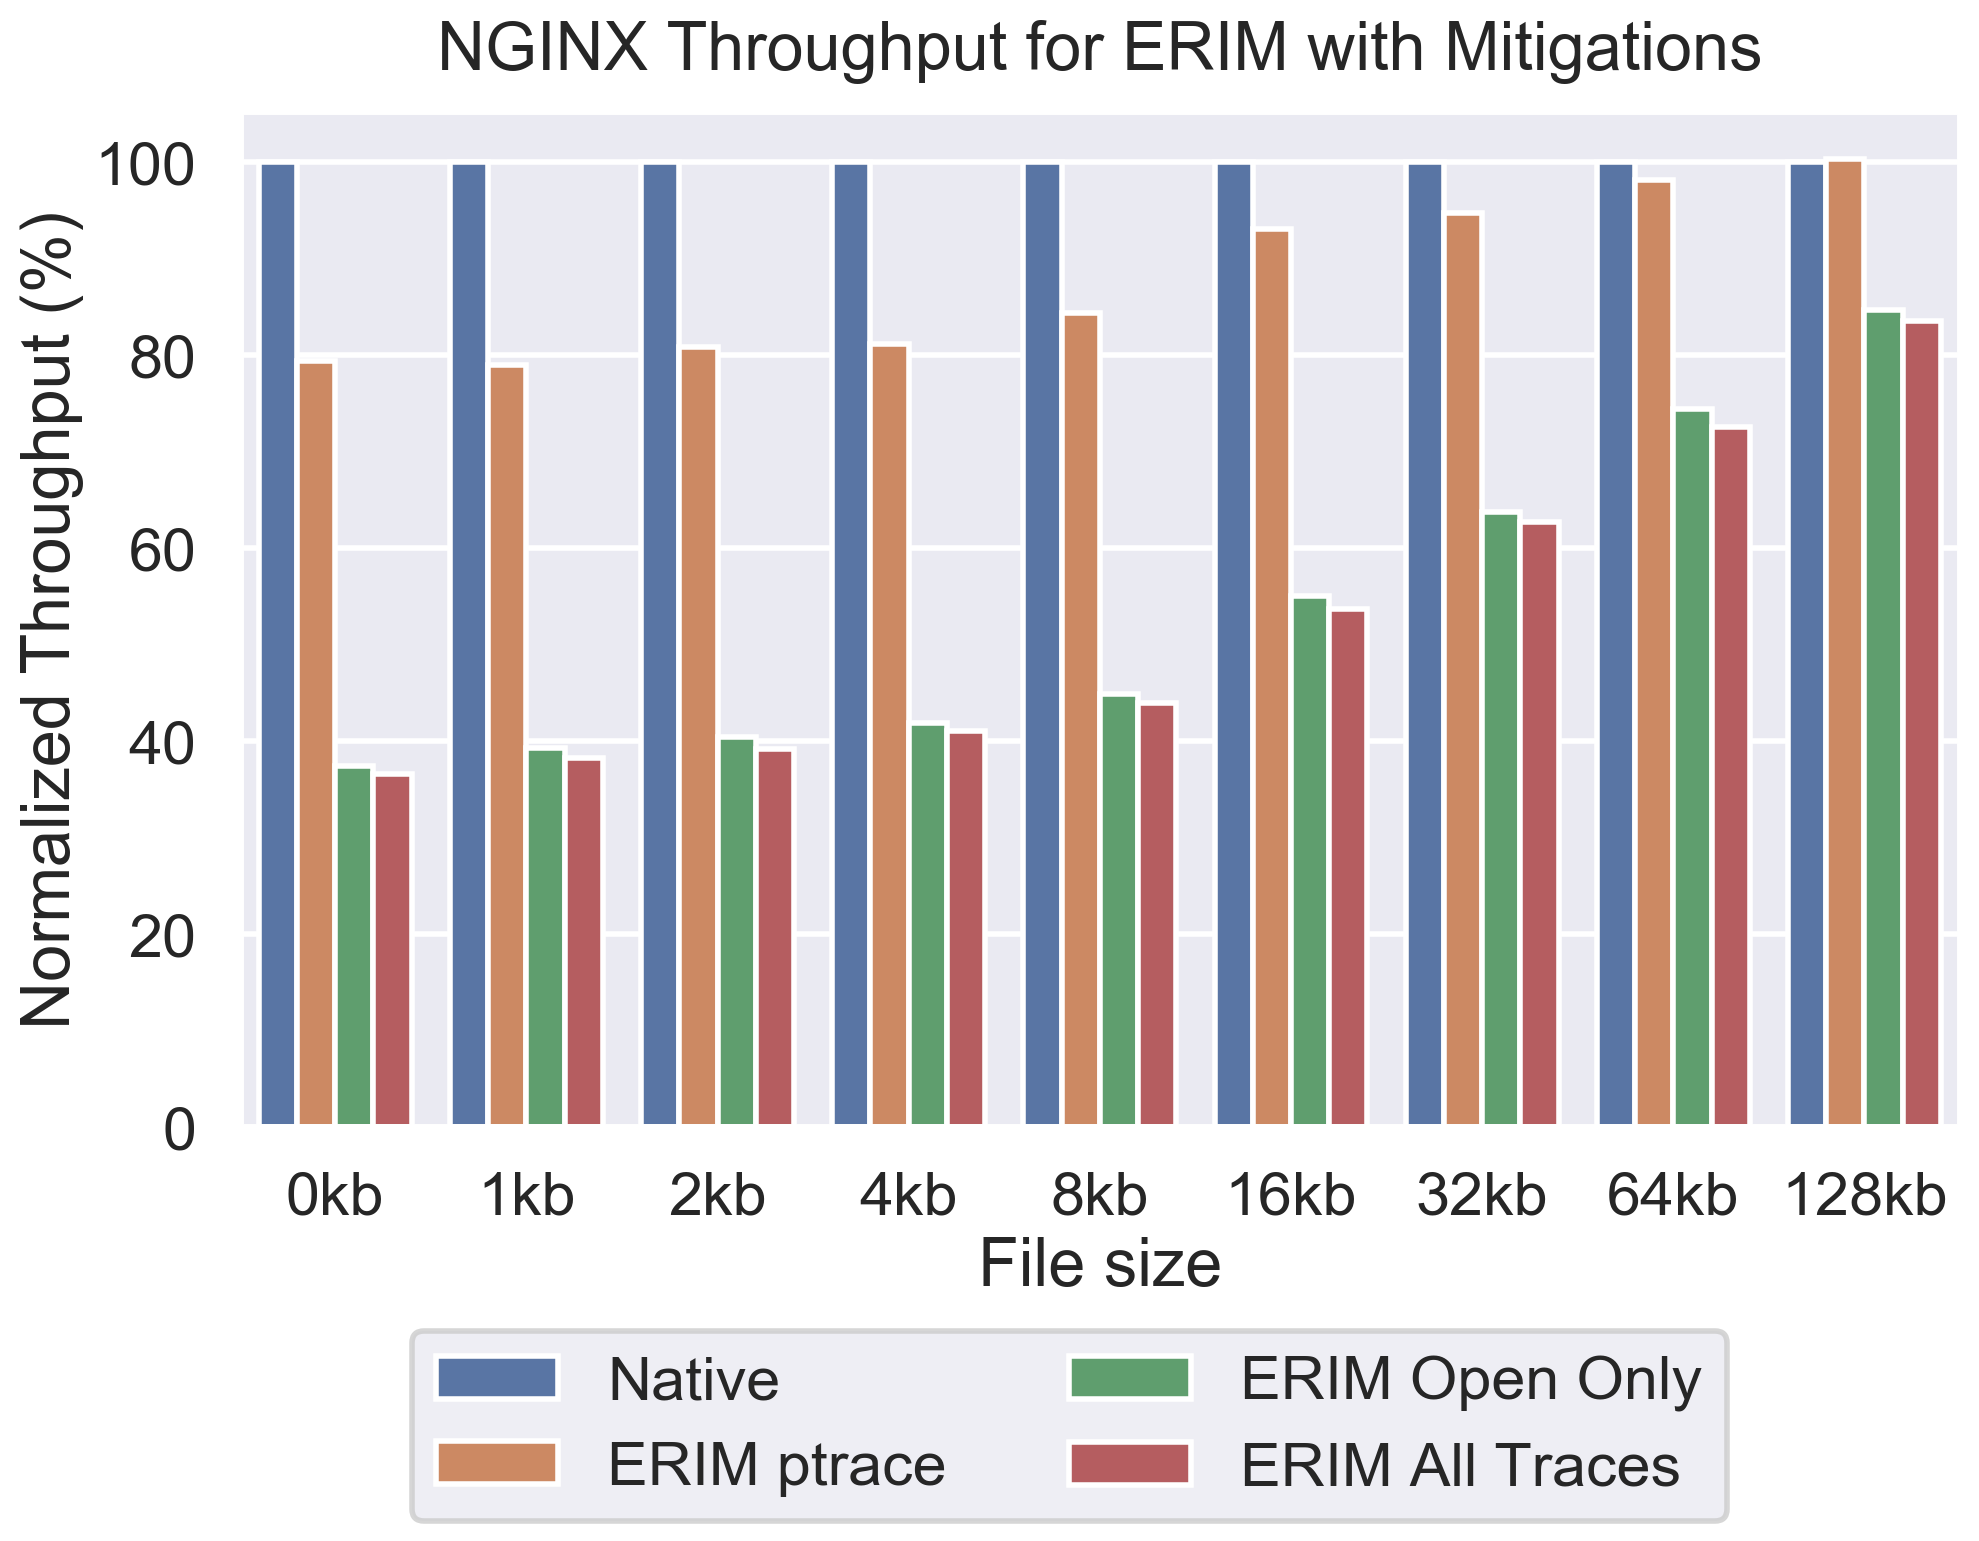

In [17]:
fig, ax = plt.subplots(figsize=(10,8), dpi=200)
sns.barplot(x='File size', y='Normalized Throughput (%)', data=second_normalized_reqs_df, 
            hue='Build', hue_order=['Native', 'ERIM ptrace', 'ERIM Open Only', 'ERIM All Traces'], palette="deep", ax=ax)
plt.legend(bbox_to_anchor=(0.1, -0.20), loc=2, borderaxespad=0., ncol=2)
plt.title("NGINX Throughput for ERIM with Mitigations", fontsize=24, pad=15)
plt.tight_layout()
plt.savefig('throughput-mitigations.png', dpi=200)